In [3]:
# Import pandas

import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
## Importing the dataset

df = pd.read_csv('/content/drive/MyDrive/July Showcase/diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [7]:
## Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [8]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


9% of subjects have diabetes. This shows that the dataset is not balanced and we will need to oversample the dataset in order to be able to use it for prediction.

# Exploratory Data Analysis

I want to learn more about the data

In [9]:
## Dropping the 'year', 'location' columns

df = df.drop(columns=['year', 'location'], axis=1)

In [10]:
## Dropping race columns

df = df.drop(columns=['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic','race:Other'], axis=1)

In [11]:
# Checking the correlation of numeric data to each other and to the occurence of Diabetes

corr=df.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
hbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

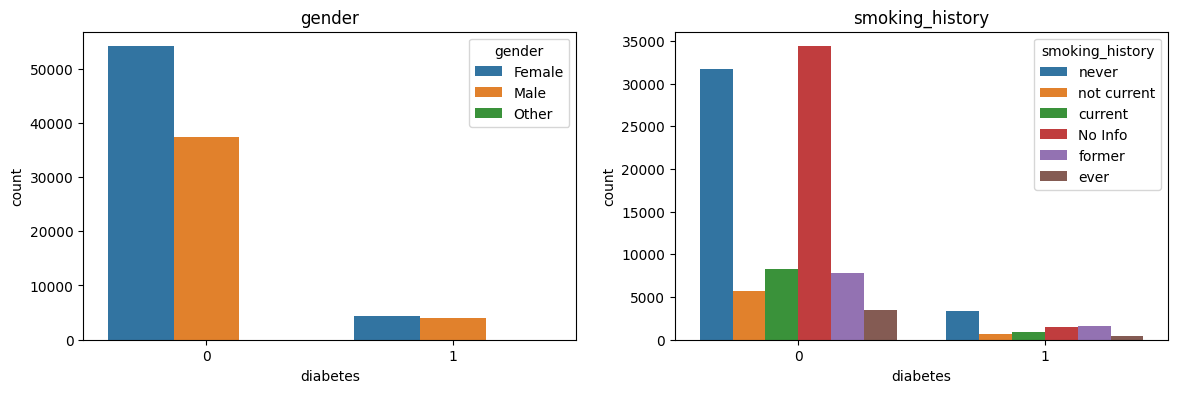

In [13]:
cols=['gender', 'smoking_history']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax=plt.subplot(1,len(cols), i+1)
    sns.countplot(x = 'diabetes', hue = str(col), data = df)
    ax.set_title(f"{col}")

# Data Preprocessing

In [14]:
# I want to know the unique values in the gender column

df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [15]:
# I want to know the unique values in the gender column

df['smoking_history'].unique()

array(['never', 'not current', 'current', 'No Info', 'ever', 'former'],
      dtype=object)

In [16]:
# Using one hot encoding to encode gender and smoking_history columns
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'])

df_encoded.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,27.32,5.0,100,0,True,False,False,False,False,False,False,True,False
1,29.0,0,0,19.95,5.0,90,0,True,False,False,False,False,False,False,True,False
2,18.0,0,0,23.76,4.8,160,0,False,True,False,False,False,False,False,True,False
3,41.0,0,0,27.32,4.0,159,0,False,True,False,False,False,False,False,True,False
4,52.0,0,0,23.75,6.5,90,0,True,False,False,False,False,False,False,True,False


In [17]:
# gender is showing as boolean so I want to change it to int64

df_encoded['gender_Female']= df_encoded['gender_Female'].astype('int64')
df_encoded['gender_Male']= df_encoded['gender_Male'].astype('int64')
df_encoded['gender_Other']= df_encoded['gender_Other'].astype('int64')

df_encoded.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,27.32,5.0,100,0,1,0,0,False,False,False,False,True,False
1,29.0,0,0,19.95,5.0,90,0,1,0,0,False,False,False,False,True,False
2,18.0,0,0,23.76,4.8,160,0,0,1,0,False,False,False,False,True,False
3,41.0,0,0,27.32,4.0,159,0,0,1,0,False,False,False,False,True,False
4,52.0,0,0,23.75,6.5,90,0,1,0,0,False,False,False,False,True,False


In [18]:
# smoking history is showing as boolean so I want to change it to int64

df_encoded['smoking_history_No Info']= df_encoded['smoking_history_No Info'].astype('int64')
df_encoded['smoking_history_never']= df_encoded['smoking_history_never'].astype('int64')
df_encoded['smoking_history_former']= df_encoded['smoking_history_former'].astype('int64')
df_encoded['smoking_history_not current']= df_encoded['smoking_history_not current'].astype('int64')
df_encoded['smoking_history_current']= df_encoded['smoking_history_current'].astype('int64')
df_encoded['smoking_history_ever']= df_encoded['smoking_history_ever'].astype('int64')

df_encoded.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,27.32,5.0,100,0,1,0,0,0,0,0,0,1,0
1,29.0,0,0,19.95,5.0,90,0,1,0,0,0,0,0,0,1,0
2,18.0,0,0,23.76,4.8,160,0,0,1,0,0,0,0,0,1,0
3,41.0,0,0,27.32,4.0,159,0,0,1,0,0,0,0,0,1,0
4,52.0,0,0,23.75,6.5,90,0,1,0,0,0,0,0,0,1,0


In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   hbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  int64  
 8   gender_Male                  100000 non-null  int64  
 9   gender_Other                 100000 non-null  int64  
 10  smoking_history_No Info      100000 non-null  int64  
 11  smoking_history_current      100000 non-null  int64  
 12  smoking_history_ever         100000 non-null  int64  
 13  

In [20]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["diabetes"], axis=1)
y = df_encoded["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 75721 to 42410
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          20000 non-null  float64
 1   hypertension                 20000 non-null  int64  
 2   heart_disease                20000 non-null  int64  
 3   bmi                          20000 non-null  float64
 4   hbA1c_level                  20000 non-null  float64
 5   blood_glucose_level          20000 non-null  int64  
 6   gender_Female                20000 non-null  int64  
 7   gender_Male                  20000 non-null  int64  
 8   gender_Other                 20000 non-null  int64  
 9   smoking_history_No Info      20000 non-null  int64  
 10  smoking_history_current      20000 non-null  int64  
 11  smoking_history_ever         20000 non-null  int64  
 12  smoking_history_former       20000 non-null  int64  
 13  smoking_history_n

In [21]:
# I oversample the dataset so it can be balanced

from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, Y_smote

pd.Series(y_train).value_counts()

,count
diabetes,
0,73203
1,73203


In [22]:
# I standardize the data so that each of the features falls within a similar range for comparison.

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Choosing an Algorithm

Select an algorithm to perform machine learning
## RandomForestClassifier
Here, I choose the RandomForestClassifier algorithm to learn to make predictions from the dataset.

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_std, y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test_std)
print(accuracy_score(pred, y_test))

0.9654


In [25]:
# I want to get a confusion matrix to better understand how useful my prediction model is

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_std)
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[18103   194]
 [  498  1205]]


In [26]:
from sklearn.metrics import recall_score

recal = model.predict(X_test_std)
print(recall_score(recal, y_test))

0.8613295210864903


In [27]:
from sklearn.metrics import precision_score

prec = model.predict(X_test_std)
print(precision_score(prec, y_test))

0.7075748678802114


## Here is an explanation of the confusion matrix

The Upper left quadrant shows how many of the predictions are negative and true, and that's 18088

The Upper right quadrant shows how many of the predictions are positive and false, and that's 209

The lower left quadrant shows how many of the predictions are negative and false, and that's 498

The lower right quadrant shows how many of the predictions are positive and true, and that's 1205

accuracy = true_prediction_negative + true_prediction_positive / total
         = (18088+1205)/20000 = 96.45%
         This means the model is 96.45% accurate.

precision = true_prediction positive/total_truely_negative
       = 1205/(209+1205) = 70.76%
       This means that the model was correct 70.76% of the time.

recall = true_prediction positive/total_positive_prediction
          = 1205/(498+1205) = 85.22%
          This indicates that the model identified 85.22% of diabetes cases correctly.

# Save the Model

In [28]:
# import joblib to save model

import joblib

In [29]:
filename = 'Diaken_model.joblib'
joblib.dump(model, filename)

['Diaken_model.joblib']